# Hidden Characters Borealis

Hi! Welcome to the official colab demo for our demo "Diffusion Illusions: Hiding Images in Plain Sight". [https://ryanndagreat.github.io/Diffusion-Illusions/](https://ryanndagreat.github.io/Diffusion-Illusions/)

This project was inspired by our paper "Peekaboo: Text to Image Diffusion Models are Zero-Shot Segmentors". The Peekaboo project website: [https://ryanndagreat.github.io/peekaboo/](https://ryanndagreat.github.io/peekaboo/)

Instructions:

0. Go to the Runtime menu, and make sure this notebook is using GPU!
1. Run the top 2 code cells (one cleans colab's junk and downloads the source code, while the other installs python packages)
2. Click 'Runtime', then 'Restart Runtime'. You need to do this the first time you open this notebook to avoid weird random errors from the pip installations.
3. Run code cells to load stable diffusion. The first time you run it it will take a few minutes to download; subsequent times won't take long at all though.
4. Run all the cells below that, and customize prompt_w, prompt_x, prompt_y, and prompt_z!
5. Take the result top_image and bottom_image, print them out, and shine a backlight through them like shown in the Diffusion Illusion website (link above!)

I may also create a YouTube tutorial if there's interest. Let me know if this would be helpful!

This notebook was written by Ryan Burgert. Feel free to reach out to me at rburgert@cs.stonybrook.edu if you have any questions! 

In [1]:
import rp
print("BOREALIS V1")

HEADLESS = 'HEADLESS' in vars() and HEADLESS #This is set to True when we run this headless. And, if this cell is run twice, it will STILL be false!
print("HEADLESS:",HEADLESS)

BOREALIS V1
HEADLESS: False


In [2]:
TYPE='HIDDEN' #'FLIPPY', 'ROTATOR', 'HIDDEN'
if not HEADLESS:
    BIG=True
    BIG=False

    
    USE_SDXL=True

    # USE_SDXL=False

    SAVE_DIR='borealis'
    SAVE_TITLE='trial'
    
    SDS_ITERS=1
    
    gpu=rp.select_torch_device() if 'gpu' not in vars() else gpu

    #FOR SDS
    print("IUHAIUHSDIUHASHIUDALIUHSDHILUASLHIUALHISUHILU")
    model_name="CompVis/stable-diffusion-v1-4"  if 'model_name' not in vars() else model_name

    SEED=int(rp.gtoc())

    AUTO_WEIGHT=True

                      ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━━┓
                      ┃ GPU ID ┃       Name       ┃      Used      ┃   Free ┃  Total ┃ Temp ┃ Util ┃ Processes ┃
                      ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━━┩
Selecting cuda:0 –––> │   0    │ NVIDIA RTX A5000 │ 319.9MB   1.3% │ 23.7GB │ 24.0GB │ 69°C │   0% │           │
                      │   1    │ NVIDIA RTX A5000 │ 319.9MB   1.3% │ 23.7GB │ 24.0GB │ 37°C │   0% │           │
                      │   2    │ NVIDIA RTX A5000 │ 319.9MB   1.3% │ 23.7GB │ 24.0GB │ 34°C │   0% │           │
                      │   3    │ NVIDIA RTX A5000 │ 319.9MB   1.3% │ 23.7GB │ 24.0GB │ 42°C │   0% │           │
                      └────────┴──────────────────┴────────────────┴────────┴────────┴──────┴──────┴───────────┘
IUHAIUHSDIUHASHIUDALIUHSDHILUASLHIUALHISUHILU


In [3]:

import random
# random.seed(SEED)

import numpy as np
import rp
import torch
import torch.nn as nn
import source.stable_diffusion as sd
from easydict import EasyDict
from source.learnable_textures import LearnableImageFourier, LearnableImageRasterSigmoided
from source.stable_diffusion_labels import NegativeLabel
from itertools import chain
import time

start_time=rp.gtoc()

/home/ryan/miniconda3/envs/diffilu/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 1.12.1 with CUDA 1106 (you have 2.2.1+cu118)
    Python  3.10.13 (you have 3.10.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [4]:
if not HEADLESS and 'prompt_a' not in vars():
    #ONLY GOOD PROMPTS HERE
    example_prompts = rp.load_yaml_file('source/example_prompts.yaml')
    print('Available example prompts:', ', '.join(example_prompts))
    
    # title='lipstick volcano porche kitten_in_box picard'
    # title='thomas_tank_military thomas_tank_military thomas_tank_military thomas_tank_military walter_white'
    title='froggo froggo froggo froggo porche'
    title='lipstick lipstick lipstick lipstick gandalf'
    title='miku miku miku miku picard'
    title='miku miku miku miku pyramids'
    title='stormtrooper stormtrooper stormtrooper stormtrooper fire_magic_girl'
    title = 'gandalf gandalf gandalf gandalf miku' 
    title='miku froggo lipstick kitten_in_box darth_vader'
    #These prompts are all strings - you can replace them with whatever you want! By default it lets you choose from example prompts
    title='pyramids pyramids pyramids pyramids miku'
    title='pencil_cow pencil_penguin pencil_dog_head pencil_giraffe_head pencil_cat_head'
    title='victorial_dress winter summer kitten_in_box froggo'
    title='miku miku miku miku picard'
    # title='shreck shreck shreck shreck shreck'
    # title='kitten_in_box kitten_in_box kitten_in_box kitten_in_box pikachu'
    prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = rp.gather(example_prompts, title.split())
    
    prompt_a="a beautiful photo of a cute white fluffy dog"
    prompt_b="Cthulu Mind Flayer"
    prompt_c=prompt_d="shrek"
    
    
    #Prompts a,b,c,d are the normal looking images
    #Prompt z is the hidden image you get when you overlay them all on top of each other
    # prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = [*(['happy puppies']*4),'the word "HELP!"']
    # prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = ['cute anime boy','cute anime girl','cute anime dog','cute anime cat','the word "DANGER!"']
    # prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = ['photo of astronaut in space','a 3d photo of a beautiful spaceship fighter craft sleek','beautiful photo of planets with rings','a beautiful photo of the moon','nyan cat']
    
    
    # prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = [*['a beautiful award-winning photograph of a phd student reading papers','a beautiful photograph a student working on a laptop','national geographic photo of seagulls eating fries at the dock','a portrait of a photo of a phd student reading papers'],'this is fine dog in fire']
    prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = [*(['a playground with a swingset and slides']*4),'the word "DANGER!"']
    # prompt_a, prompt_b, prompt_c, prompt_d, prompt_z = [*(['a photo of the deep jungle']*4),'the word "DANGER!"']

    prompt_a = 'a playground with a swingset and slides'
    # prompt_b = 'brass gears'
    prompt_b = 'a beautiful garden with stone arches, flowers and trees'
    prompt_c = 'photo of astronaut in space'
    prompt_d = 'a photograph science lab with beakers and test tubes'

    prompt_a = 'beautiful photo of planets with rings'
    prompt_a = 'a human skull, award winning photograph artstation'
    
    # prompt_a = 'fire tornado. a tornado funnel made of flames'
    # prompt_b = 'big spellbook. pile of books.'
    
    
    

#     prompt_a,prompt_z = 'dreamworks 3d rendering of puss in boots', 'dreamworks 3d rendering of shrek'
#     prompt_a,prompt_b,prompt_c,prompt_d,prompt_z=['an intricate detailed hb pencil sketch of a %s'%x.strip() for x in 'dog head, girl head, boy head, tree, cat head'.split(',')]



#     prompt_a,prompt_b,prompt_c,prompt_d,prompt_z=(
#     'a beautiful award-winning royalty-free full-frame stock photo of an isolated sheep',
#     'a beautiful award-winning royalty-free full-frame stock photo of an isolated bus',
#     'a beautiful award-winning royalty-free full-frame stock photo of an isolated sofa',
#     'a beautiful award-winning royalty-free full-frame stock photo of an isolated potted plant',
#     'a beautiful award-winning royalty-free full-frame stock photo of an isolated dog',
# )
    # prompt_a,prompt_b,prompt_c,prompt_d,prompt_z=['an intricate detailed hb pencil sketch of a %s'%x.strip() for x in 'spotted cow, penguin, dog head, giraffe head, cat head'.split(',')]
    
    # prompt_c="an intricate detailed hb pencil sketch of a puppy dog bichon head"
    # SK='hb pencil sketch'
    # CO='photorealistic color oil painting'
    # prompt_a=prompt_a.replace(SK,CO)
    # prompt_b=prompt_b.replace(SK,CO)
    # prompt_c=prompt_c.replace(SK,CO)
    # prompt_d=prompt_d.replace(SK,CO)
    # prompt_z=prompt_z.replace(SK,CO)


negative_prompt = 'watermark blurry blurry blurry blurry blurry blurry grayscale, blurry'

print()
print('Negative prompt:',repr(negative_prompt))
print()
print('Chosen prompts:')
print('    prompt_a =', repr(prompt_a))
print('    prompt_b =', repr(prompt_b))
print('    prompt_c =', repr(prompt_c))
print('    prompt_d =', repr(prompt_d))
print('    prompt_z =', repr(prompt_z))

Available example prompts: pwkitten_in_box, magic_emma_watson, emma_watson, yorkshire_terrier_santa, norwegian_winter_girl, magic_forest_temple, sailing_ship, bioshock_lighthouse, two_bunnys_hugging, thomas_tank_military, wolf_on_rock, victorial_dress, lolita_dress_magical_elf, pencil_giraffe_head, pencil_penguin, pencil_violin, pencil_orca_whale, pencil_cow, pencil_walrus, pencil_cat_head, pencil_dog_head, ape_with_gun, human_skeleton, gold_coins, bear_in_forest, mickey_mouse, mushroom, mario, burger, darth_vader, gandalf, fantasy_city, green_elf_girl, pikachu, spring, fall, winter, summer, miku, pyramids, dinosaur, lipstick, picard, bull_wing, froggo, assasin_creed, moon, minecraft_zombie, pistol, disco_ball, volcano, porche, hawaii_beach, walter_white, dalek, tardis, tennant, weeping_angel, stormtrooper, lowpoly_island, fire_magic_girl, fire_magic_man, the_one_ring, frodo, gollum, smaug, donut, sushi, icecream, strawberry, anime_bunny, anime_girl_under_stars, anime_witch_girl, samur

In [5]:
if 's' not in dir():
    # model_name=
    s=sd.StableDiffusion(gpu,model_name)
device=s.device

[INFO] sd.py: loading stable diffusion...please make sure you have run `huggingface-cli login`.


Loading pipeline components...: 100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 19.76it/s]


[INFO] sd.py: loaded stable diffusion!


In [6]:
label_a = NegativeLabel(prompt_a,negative_prompt)
label_b = NegativeLabel(prompt_b,negative_prompt)
label_c = NegativeLabel(prompt_c,negative_prompt)
label_d = NegativeLabel(prompt_d,negative_prompt)
label_z = NegativeLabel(prompt_z,negative_prompt)

In [7]:
CLEAN_MODE = True # If it's False, we augment the images by randomly simulating how good a random printer might be when making the overlays...

def simulate_overlay(a,b,c,d):
    if CLEAN_MODE:
        exp=1
        brightness=3
        black=0
    else:
        exp=rp.random_float(.5,1)
        brightness=rp.random_float(1,5)
        black=rp.random_float(0,.5)
        bottom=rp.blend(bottom,black,rp.random_float())
        top=rp.blend(top,black,rp.random_float())
    return (a**exp * b**exp *c**exp * d**exp * brightness).clamp(0,99).tanh()

In [8]:
#Image Parametrization and Initialization (this section takes vram)

#Select Learnable Image Size (this has big VRAM implications!):
#Note: We use implicit neural representations for better image quality
#They're previously used in our paper "TRITON: Neural Neural Textures make Sim2Real Consistent" (see tritonpaper.github.io)
# ... and that representation is based on Fourier Feature Networks (see bmild.github.io/fourfeat)
# num_prime_images=4

# learnable_image_maker = lambda: LearnableImageFourier(height=256, width=256, hidden_dim=256, num_features=128, num_channels=3*num_prime_images).to(s.device); SIZE=256
# # learnable_image_maker = lambda: LearnableImageFourier(height=384,width=384,num_features=256,hidden_dim=256,scale=15).to(s.device);SIZE=384
# # learnable_image_maker = lambda: LearnableImageFourier(height=512,width=512,num_features=256,hidden_dim=256,scale=20).to(s.device);SIZE=512

# image_a=lambda: learnable_image_maker()[0:3]# learnable_image_maker()
# image_b=lambda: learnable_image_maker()[3:6]# learnable_image_maker()
# image_c=lambda: learnable_image_maker()[6:9]# learnable_image_maker()
# image_d=lambda: learnable_image_maker()[9:12]# learnable_image_maker()
def learnable_image_maker(size,num_chans):
    return LearnableImageFourier(
                height=size,
                width=size,
                hidden_dim=256,
                num_features=256 if BIG else 128,
                num_channels=num_chans,
                scale=15 if BIG else 10,
            )


class Invalidatable:
    def __init__(self, get):
        self.get=get
        self._cache=None
        self._valid=False
    def __call__(self):
        if not self._valid:
            self._cache=self.get()
            self._valid=True
        return self._cache
    def invalidate():
        self._valid=False

class LearnableImageBatch(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.SIZE=512 if BIG else 256

        self._mega_image=LearnableImageFourier(
            height=self.SIZE,
            width=self.SIZE,
            hidden_dim=256,
            num_features=256 if BIG else 128,
            num_channels=3*4,
            scale=15 if BIG else 10,
        )

        self._mega_image = self._mega_image
        self._mega_image_cache = None

        self._images = [self.get_a, self.get_b, self.get_c, self.get_d, self.get_z]

        self.handled=[True, True, True, True, True]

    
    def _get_mega_image(self, cached=False):
        if not cached or self._mega_image_cache is None:
            self._mega_image_cache = self._mega_image()
        return self._mega_image_cache
        
    def _get_sub_image(self,index,cached=False):
        #Use invalidation for big speed boost!
        return self._get_mega_image(cached=cached)[index*3:(index+1)*3]
        
    def get_a(self,cached=False):return self._get_sub_image(0,cached=cached)
    
    def get_b(self,cached=False):return self._get_sub_image(1,cached=cached)
        
    def get_c(self,cached=False):return self._get_sub_image(2,cached=cached)    
        
    def get_d(self,cached=False):return self._get_sub_image(3,cached=cached)    

    def get_z(self,cached=False):
        return simulate_overlay(
            self.get_a(cached=cached), 
            self.get_b(cached=True), 
            self.get_c(cached=True), 
            self.get_d(cached=True),
        )

    def __getitem__(self,index):
        return self._images[index]
        
    def __len__(self):
        return len(self._images)



class IndependentLearnableImageBatch(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.SIZE=512 if BIG else 256

        self._primes=nn.ModuleList([
            LearnableImageFourier(
                height=self.SIZE,
                width=self.SIZE,
                hidden_dim=256,
                num_features=256 if BIG else 128,
                num_channels=3,
                scale=15 if BIG else 10,
            )
            for x in range(4)
        ])

        self.handled=[True, True, True, True, True]


        self._mega_image_cache = None

        self._images = [self.get_a, self.get_b, self.get_c, self.get_d, self.get_z]
        
    def _get_sub_image(self,index,cached=False):
        #Use invalidation for big speed boost!
        return self._primes[index]()
        
    def get_a(self):return self._get_sub_image(0)
    
    def get_b(self):return self._get_sub_image(1)
        
    def get_c(self):return self._get_sub_image(2)    
        
    def get_d(self):return self._get_sub_image(3)    

    def get_z(self):
        return simulate_overlay(
            self.get_a(), 
            self.get_b(), 
            self.get_c(), 
            self.get_d(),
        )

    def __getitem__(self,index):
        return self._images[index]
        
    def __len__(self):
        return len(self._images)




class FlippyImageBatch(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.SIZE=512 if BIG else 256

        self._primes=nn.ModuleList([
            LearnableImageFourier(
                height=self.SIZE,
                width=self.SIZE,
                hidden_dim=256,
                num_features=256 if BIG else 128,
                num_channels=3,
                scale=15 if BIG else 10,
            )
            for x in range(1)
        ])

        self.handled=[True, False, False, False, True]
        
        self._mega_image_cache = None

        self._empty=self._get_empty().to(device)

        self._images = [self.get_a, self.get_b, self.get_c, self.get_d, self.get_z]

    def _get_empty(self):
        #Instead of refactoring the code to take two images, I'll just nullify the others...
        with torch.no_grad():
            return torch.zeros(3,self.SIZE,self.SIZE)
        
    def _get_sub_image(self,index,cached=False):
        #Use invalidation for big speed boost!
        return self._primes[index]()
        
    def get_a(self):return self._get_sub_image(0)
    
    def get_b(self):return self._empty
        
    def get_c(self):return self._empty
        
    def get_d(self):return self._empty

    def get_z(self):return self.get_a().rot90(k=2,dims=[1,2]) #Upside-down

    def __getitem__(self,index):
        return self._images[index]
        
    def __len__(self):
        return len(self._images)

if TYPE=='HIDDEN':
    learnable_images=IndependentLearnableImageBatch().to(device)
elif TYPE=='FLIPPY':
    learnable_images=FlippyImageBatch().to(device)
else:
    assert False,'bad TYPE: '+str(TYPE)

SIZE=learnable_images.SIZE
handled=learnable_images.handled

In [9]:


# learnable_image_a=lambda: image_a()
# learnable_image_b=lambda: image_b()
# learnable_image_c=lambda: image_c()
# learnable_image_d=lambda: image_d()
# learnable_image_z=lambda: simulate_overlay(image_a(), image_b(), image_c(), image_d())

# params=chain(
#     image_a.parameters(),
#     image_b.parameters(),
#     image_c.parameters(),
#     image_d.parameters(),
# )

params = learnable_images.parameters()
optim=torch.optim.SGD(params,lr=1e-4)

In [10]:
labels=[label_a, label_b, label_c, label_d, label_z]
learnable_images = [learnable_image_a,learnable_image_b,learnable_image_c,learnable_image_d,learnable_image_z] = list(learnable_images)

#The weight coefficients for each prompt. For example, if we have [1,1,1,1,5], then the hidden prompt (prompt_z) will be prioritized
weights=[1,1,1,1,2]

weights=rp.as_numpy_array(weights)
weights=weights/weights.sum()
weights=weights*len(weights)

In [11]:
#For saving a timelapse
ims=[]

In [12]:
def get_display_image():
    return rp.tiled_images(
        [
            *[rp.as_numpy_image(image()) for image in learnable_images[:-1]],
            rp.as_numpy_image(learnable_image_z()),
        ],
        length=len(learnable_images),
        border_thickness=0,
    )

Every 200 iterations we display an image in the form [image_a, image_b, image_c, image_d, image_z] where
    image_z = image_a * image_b * image_c * image_d

Interrupt the kernel at any time to return the currently displayed image
You can run this cell again to resume training later on

Please expect this to take hours to get good images (especially on the slower Colab GPU's! The longer you wait the better they'll be


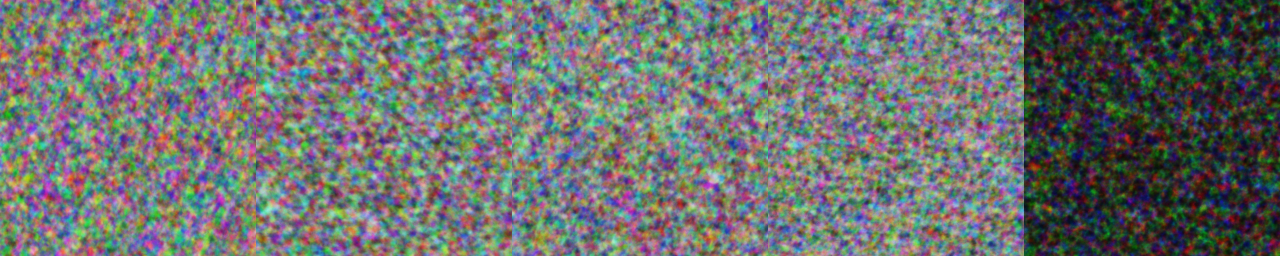

In [13]:
NUM_ITER=SDS_ITERS #We don't use SDS anymore

weights=[1.5,1,1,1,1]


# NUM_ITER=10000

#Set the minimum and maximum noise timesteps for the dream loss (aka score distillation loss)
s.max_step=MAX_STEP=990
s.min_step=MIN_STEP=10 

display_eta=rp.eta(NUM_ITER, title='Status: ')

DISPLAY_INTERVAL = 200

print('Every %i iterations we display an image in the form [image_a, image_b, image_c, image_d, image_z] where'%DISPLAY_INTERVAL)
print('    image_z = image_a * image_b * image_c * image_d')
print()
print('Interrupt the kernel at any time to return the currently displayed image')
print('You can run this cell again to resume training later on')
print()
print('Please expect this to take hours to get good images (especially on the slower Colab GPU\'s! The longer you wait the better they\'ll be')

try:
    for iter_num in range(NUM_ITER):
        display_eta(iter_num) #Print the remaining time

        preds=[]
        for is_handled,label,learnable_image,weight in rp.random_batch(list(zip(handled,labels,learnable_images,weights)), batch_size=1):
            if not is_handled:
                continue
            pred=s.train_step(
                label.embedding,
                learnable_image()[None],

                #PRESETS (uncomment one):
                noise_coef=.1*weight,guidance_scale=60,#10
                # noise_coef=0,image_coef=-.01,guidance_scale=50,
                # noise_coef=0,image_coef=-.005,guidance_scale=50,
                # noise_coef=.1,image_coef=-.010,guidance_scale=50,
                # noise_coef=.1,image_coef=-.005,guidance_scale=50,
                # noise_coef=.1*weight, image_coef=-.005*weight, guidance_scale=50,
            )
            preds+=list(pred)

        if not iter_num%DISPLAY_INTERVAL:
            im = get_display_image()
            ims.append(im)
            with torch.no_grad():
                if iter_num and not iter_num%(DISPLAY_INTERVAL*50):
                    #Wipe the slate every 50 displays so they don't get cut off
                    from IPython.display import clear_output
                    clear_output()
    
                if not iter_num%DISPLAY_INTERVAL:
                    rp.display_image(im)

        optim.step()
        optim.zero_grad()
except KeyboardInterrupt:
    print()
    print('Interrupted early at iteration %i'%iter_num)
    im = get_display_image()
    ims.append(im)
    rp.display_image(im)

Image A


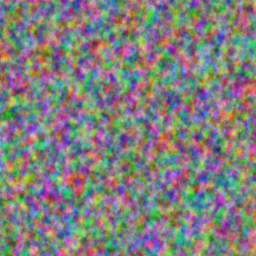

Image B


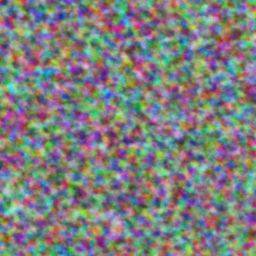

Image C


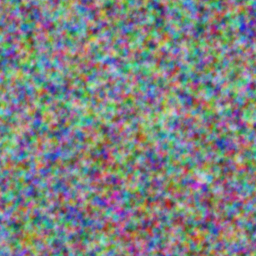

Image D


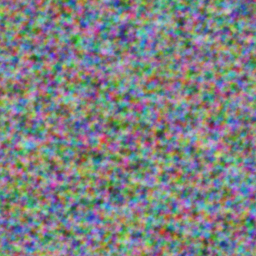

Image Z


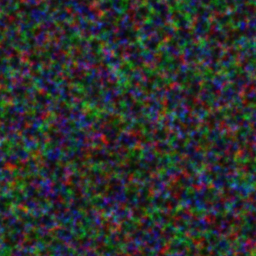

In [14]:
print('Image A')
rp.display_image(rp.as_numpy_image(learnable_image_a()))

print('Image B')
rp.display_image(rp.as_numpy_image(learnable_image_b()))

print('Image C')
rp.display_image(rp.as_numpy_image(learnable_image_c()))

print('Image D')
rp.display_image(rp.as_numpy_image(learnable_image_d()))

print('Image Z')
rp.display_image(rp.as_numpy_image(learnable_image_z()))

In [15]:
# def save_run(name):
#     folder="untracked/hidden_character_runs/%s"%name
#     if rp.path_exists(folder):
#         folder+='_%i'%time.time()
#     rp.make_directory(folder)
#     ims_names=['ims_%04i.png'%i for i in range(len(ims))]
#     print()
#     rp.save_video_mp4(ims,folder+'.mp4',video_bitrate='high')
#     with rp.SetCurrentDirectoryTemporarily(folder):
#         rp.save_images(ims,ims_names,show_progress=True)
#         pass
#     print('Saved timelapse to folder:',repr(folder))
    
# save_run(title) #You can give it a good custom name if you want!

In [16]:
logger_images=[]
logger_timestamps=[]
logger_targets=[]
logger_losses=[]

In [ ]:
GRAYSCALE=True
GRAYSCALE=False
try:
    def global_set(**names_vals):
        def out():
            for name,val in names_vals.items():
                rp.fansi_print("SETTING "+name+" TO "+str(val), 'green','bold')
                globals()[name]=val
        return out
    
    import icecream
        
    if not HEADLESS:

        # SMOOTH_PROB=0

        # FREEZE=[0,0,0,0,0]
        # WEIGHTS_LIST=[1,1,1,1,1.5] #If one of the images looks sus, add more weight!
        # WEIGHTS_LIST=[1,1,1,1,2] #If one of the images looks sus, add more weight!

        WEIGHT_ON_WORST=False #Boost the worst?
        
        # WEIGHTS_LIST=[1,1,1,1,3] #If one of the images looks sus, add more weight!
        # sss=[1]+rp.shuffled(rp.resize_list([.9,.7,.6,.5,.3,.2],100));GUIDANCE=7.5;STEPS=2000;SMOOTH_PROB=.0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = 0 ; MSE_COEF = 1 ; WEIGHTS_LIST=[1,1,1,1,2]#COMPLETE - fast'n sloppy
        # sss=rp.shuffled(rp.resize_list([.7],100));GUIDANCE=7.5;STEPS=2000;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1 ; WEIGHTS_LIST=[1,1,1,1,2]
        # sss=rp.shuffled(rp.resize_list([.5],100));GUIDANCE=7.5;STEPS=2000;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1; WEIGHTS_LIST=[1,1,1,1,2]
        # sss=rp.shuffled(rp.resize_list([.5],100));GUIDANCE=7.5;STEPS=20000;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1; WEIGHTS_LIST=[1,1,1,1,2]
        
        
        ZI_OVERRIDE=None
        # ZI_OVERRIDE=rp.load_image("https://m.media-amazon.com/images/I/51nHtpT5hEL._AC_UF894,1000_QL80_.jpg",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,.5]
        # ZI_OVERRIDE=rp.inverted_image(rp.load_image("https://i.imgur.com/BlnAQxm.png",use_cache=True)) ; WEIGHTS_LIST=[1,1,1,1,.5] #rig poem
        # ZI_OVERRIDE=rp.load_image("https://i.imgur.com/F006VHD.png",use_cache=True) ; #WEIGHTS_LIST=[1,1,1,1,.5]
        # ZI_OVERRIDE=rp.inverted_image(rp.load_image("https://m.media-amazon.com/images/I/612+XnLD1RL._AC_UF894,1000_QL80_.jpg",use_cache=True)) ; WEIGHTS_LIST=[1,1,1,1,1/2] #Pentagram
        # ZI_OVERRIDE=rp.load_image("https://cdn2.vectorstock.com/i/1000x1000/97/86/colorful-rainbow-swirl-vector-1549786.jpg",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,1/2] #Rainbow Swirl
        # ZI_OVERRIDE=rp.load_image("https://upload.wikimedia.org/wikipedia/en/e/ed/Nyan_cat_250px_frame.PNG",use_cache=True) ; WEIGHTS_LIST=[1,1,1.5,2,2] #Nyan Cat
        
        # ZI_OVERRIDE=rp.load_image("https://i.imgur.com/IrkQ4f3.jpeg",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,.5]
        # ZI_OVERRIDE=rp.load_image("https://static.tvtropes.org/pmwiki/pub/images/jacksfilmsyiaylivetour.png",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,.5]
        
        ZI_OVERRIDE=rp.load_image("mould_logo.png",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,.5]
        # ZI_OVERRIDE=rp.load_image("mould_logo_softened_.1_to_.9.png",use_cache=True) ; WEIGHTS_LIST=[1,1,1,1,.5]
        
        START_HERE=hash(object())
        
        sss=[
            START_HERE, #A bookmark
            dict(
                GUIDANCE=20,
                # WEIGHTS_LIST=[1,1,1,1,1] if ZI_OVERRIDE is None else [1,1,1,1,1],
                WEIGHTS_LIST=[1,1,1,1,.5],
                STEPS=1000,
                SMOOTH_PROB=0,
                FREEZE=[0,0,0,0,0],
                MSE_COEF=1,
                MSSSIM_COEF=1, #SPEEDUP
                # MSSSIM_COEF=0, #SPEEDUP
                NUM_IM2IM_STEPS=20, #SPEEDUP
                AUTO_WEIGHT=True,
            ),
            # global_set(WEIGHTS_LIST=[1,1,1,1,1]),
            # global_set(MSSSIM_COEF=0),
            1,.9,.85,#.5,.3],#,1,.7,.5,.3],
            dict(FREEZE=[0,0,0,0,1],WEIGHTS_LIST=[1,1,1,1,2], MSSSIM_COEF=1,AUTO_WEIGHT=False),
            # START_HERE,dict(WEIGHTS_LIST=[.5,1,1,1,2]), #A bookmark
            .85,.8,.75,
            
            # global_set(WEIGHTS_LIST=[1,1,1,1,2]),
            
            dict(AUTO_WEIGHT=False),
            # global_set(GUIDANCE=32),
            # global_set(STEPS=2000 if BIG else 5000),
            # global_set(GUIDANCE=4),
            # WEIGHTS_LIST=[1,1,1,1,2],
            dict(
                STEPS=2000,
                WEIGHTS_LIST=[1,1,1,1,1],
                # WEIGHTS_LIST=[1,1,1,1,3],
                # WEIGHT_ON_WORST=True,
            ),
            dict(MSSSIM_COEF=1),
            dict(GUIDANCE=30),
            # 1,
            .95,
            *[.7,.5],


            # dict(
                # STEPS=2000,
                # WEIGHTS_LIST=[1,1,1,1,.5],
                # WEIGHT_ON_WORST=True,
            # ),

            
            *[.7,.5]*1,

            # dict(
            #     WEIGHTS_LIST=[1,1,1,1,1],
            #     FREEZE=[0,0,0,0,0],
            # ),

            *[.7,.5]*3,

            
            *[.7,.5]*2,
            *[.5]*2,
            dict(STEPS=20000),
            *[.5]*1,
        ]
    
    
    if START_HERE in sss:
        SSS_BOOKMARK_INDEX=sss.index(START_HERE)
        rp.fansi_print("STARTING FROM BOOKMARK",'yellow','bold')
        sss=sss[SSS_BOOKMARK_INDEX+1:]
    
    
    #No longer used
    # sss=rp.shuffled(rp.resize_list([.3],100));GUIDANCE=7.5;STEPS=1500;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1; WEIGHTS_LIST=[1,1,1,1,2]
    # sss=rp.shuffled(rp.resize_list([.4,.3,.2],100));GUIDANCE=7.5;STEPS=3000;SMOOTH_PROB=.5;NUM_IM2IM_STEPS=50 ; MSSSIM_COEF = 0 ; MSE_COEF = 1 ; WEIGHTS_LIST=[1,1,1,1,2]
    # sss=rp.shuffled(rp.resize_list([.3],100));GUIDANCE=7.5;STEPS=20000;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1; WEIGHTS_LIST=[1,1,1,1,2]
    # sss=rp.shuffled(rp.resize_list([.8],100));GUIDANCE=7.5;STEPS=2000;SMOOTH_PROB=0;NUM_IM2IM_STEPS=50  ; MSSSIM_COEF = .2 ; MSE_COEF = 1 ; WEIGHTS_LIST=[1,1,1,1,2]
    
    
    # WEIGHTS_LIST=[2,1,1,1,1]
    skips=[False]*len(learnable_images)
    for SSS_INDEX, STRENGTH in enumerate(sss):
    
        if isinstance(STRENGTH,dict):
            global_set(**STRENGTH)()
            continue
        else:
            rp.fansi_print('IM2IM STRENGTH '+str(STRENGTH),'yellow','bold')
        
        import torch.nn.functional as F
    
        rp.pretty_print(rp.gather_vars(
            # SSS_INDEX+SSS_BOOKMARK_INDEX,
            'SSS_INDEX',
            'SSS_BOOKMARK_INDEX',
            'STRENGTH',
            'GUIDANCE',
            'STEPS',
            'SMOOTH_PROB',
            'NUM_IM2IM_STEPS',
            'MSSSIM_COEF',
            'MSE_COEF',
            'WEIGHTS_LIST',
            'USE_SDXL',
            skip_missing=True,
        ))
        
        
    
        if logger_images:
            for x in rp.resize_list(logger_images[::-1],10):
                rp.display_image(x)
        #               GUIDANCE=32 ;  TIMESTEPS=range(100, 75, -1) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.05 ; NEG='blurry unfocused low quality bokeh, depth of field' ;#Medium Light
        #               GUIDANCE=32 ;  TIMESTEPS=range(100, 75, -1) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.015 ; NEG='blurry unfocused low quality bokeh, depth of field' ;#Medium Light
        # GUIDANCE=32 ;  TIMESTEPS=range(300, 75, -5) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.055 ; NEG='blurry unfocused low quality bokeh, depth of field' ;#Medium Harsh
        # GUIDANCE=32 ;  TIMESTEPS=range(300, 75, -5) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.025 ; NEG='blurry unfocused low quality bokeh, depth of field' ;#Medium Harsh
        # GUIDANCE=16 ;  TIMESTEPS=range(300, 200, -1) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.025 ; NEG='blurry unfocused low quality bokeh, depth of field' ;#Medium Harsh
        # GUIDANCE=32 ;  TIMESTEPS=range(500, 10, -10) ;  EMA_ALPHA=.2 ;  ORIG_ALPHA=.01 ; NEG='blurry unfocused low quality bokeh, depth of field' ; #Aggressive
        # GUIDANCE=4 ;  TIMESTEPS=range(999, 500, -10) ;  EMA_ALPHA=1 ;  ORIG_ALPHA=0 ; NEG='oversaturated, blurry unfocused low quality bokeh, depth of field, unrealistic, abstract, deep fried' ; #Complete
        # GUIDANCE=20 ;  TIMESTEPS=range(999, 10, -2) ;  EMA_ALPHA=.05 ;  ORIG_ALPHA=0 ; NEG='' ; #Complete
        # GUIDANCE=7 ;  TIMESTEPS=range(999, 10, -2) ;  EMA_ALPHA=.1 ;  ORIG_ALPHA=0 ; NEG='' ; #Complete
        
        # COMPLETE=True#If this is set to True, generate the images totally from scratch using the default method
        # COMPLETE=False
        
        #Show a timelapse of each diffusion process. Can take a while to load into the notebook.
        # SHOW_ANIMS=True
        # SHOW_ANIMS=False 
        
        # @rp.monkey_patch(sd.StableDiffusion)
        # def redenoise_latent(self,                   text_embeddings:torch.Tensor,
        #                    latent:torch.Tensor,
        #                    guidance_scale:float=GUIDANCE,
        #                    t:int=None,):
                
        #         if t is None:
        #             t = torch.randint(self.min_step, self.max_step + 1, [1], dtype=torch.long, device=self.device)
        
        #         assert 0<=t<self.num_train_timesteps, 'invalid timestep t=%i'%t
        
        #         latents=latent[None]
        
                
        #         # predict the noise residual with unet, NO grad!
        #         with torch.no_grad():
        #             # add noise
        #             noise = torch.randn_like(latents)
        #             #This is the only place we use the scheduler...the add_noise function. What's more...it's totally generic! The scheduler doesn't impact the implementation of train_step...
        #             if t==999:
        #                 latents_noisy=noise+0 #Eh sometimes I want to have complete noise
        #             else:
        #                 latents_noisy = self.add_noise(latents, noise, t) #The add_noise function is identical for PNDM, DDIM, and DDPM schedulers in the diffusers library
        #             #TODO: Expand this add_noise function, and put it in this class. That way we don't need the scheduler...and we can also add an inverse function, which is what I need for previews...that subtracts noise...
        #             #Also, create a dream-loss-based image gen example notebook...
        
        #             # pred noise
        #             latent_model_input = torch.cat([latents_noisy] * 2)
        #             noise_pred = self.predict_noise(latent_model_input, text_embeddings, t)
        
                                
        #             noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
        #             noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)
                    
        #             latent_pred = self.remove_noise(latents_noisy, noise_pred, t)
        #             # rp.ic(latent_pred.shape)
        #             output = latent_pred[0]
                    
        #             # latent_pred = self.decode_latents(latent_pred)[0]
        
        #         return latent_pred[0]
        
        
            
        # def denoise_l(latent,label,T):
        #     return s.redenoise_latent(latent=latent,
        #                               text_embeddings=label.embedding,
        #                               t=torch.tensor(T, dtype=torch.int)
        #                              )
            
        # def get_ii_seqo(w=learnable_image_z, lw=label_z):
        #     seqo=[]
            
        #     if COMPLETE:
        #         out=lw.get_sample_image()
        #         rp.display_image(out)
        #         return out,[out]
            
        #     with torch.no_grad():
        #         # w,lw=learnable_image_x,label_x
        #         # w,lw=learnable_image_y,label_y
        #         # w,lw=learnable_image_z,label_z
        
        #         lw=NegativeLabel(lw.name,NEG)
        
        #         w=w()
        #         i=w
        #         i = F.interpolate(i[None], (512, 512), mode='bilinear', align_corners=False)[0]
        #         l=s.encode_img(i)
        #         ol=l
        
        #         rp.display_image(rp.as_numpy_image(i))
        
        #         # for T in [10]*100:
        #         # for T in [100,100,100,100,100]*10:
        #         # for T in [100,100,100,100,100]:
        #         rp.tic()
        #         # for T in list(range(999, 0, -10)):
        #         # for T in list(range(500, 0, -10)):
        #         # for T in list(range(999, 0, -50)):
        #         # for T in list(range(100, 0, -1)):
        #         did_999=False
        #         for T in list(TIMESTEPS):
        #             if T==999:
        #                 if did_999: continue
        #                 did_999=True
                        
        #             if T!=999:
        #                 T=rp.random_element(set(TIMESTEPS)-{999})
        #             # torch.manual_seed(298)
        
        #             dl=denoise_l(l, lw, T)
        #             # l=rp.blend(l,dl,1)#Stick to the previous, EMA, make it smooth! Less variance
        #             # l=rp.blend(l,dl,.2)#Stick to the previous, EMA, make it smooth! Less variance
        #             # l=rp.blend(l,dl,.01)#Stick to the previous, EMA, make it smooth! Less variance
        #             if T!=999:
        #                 l=rp.blend(l,dl,EMA_ALPHA)#Stick to the previous, EMA, make it smooth! Less variance
        
        #                 # l=rp.blend(l,ol,.05)#Stick to the original
        #                 l=rp.blend(l,ol,ORIG_ALPHA)#Stick to the original
        #             else:
        #                 l=dl
        #                 # l=dl
        
        #             from IPython.display import clear_output
        #             # clear_output()
        
        #             ii=rp.as_numpy_image(s.decode_latent(l))
        #             print(T)
        #             seqo.append(rp.cv_resize_image(ii,.5))
        #             if rp.toc()>10:
        #                 rp.display_image(ii)
        #                 rp.tic()
        #         rp.display_image(ii)
        #         return ii,seqo
        
        import rp
        import requests
        import torch
        from PIL import Image
        from io import BytesIO
        
        from diffusers import StableDiffusionImg2ImgPipeline,StableDiffusionXLImg2ImgPipeline
    
        if USE_SDXL:
            if not 'im2im_pipe' in dir():
                im2im_model_id_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
                im2im_pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(im2im_model_id_or_path, torch_dtype=torch.float16,                requires_safety_checker=False,
                            safety_checker=None,)
                im2im_pipe = im2im_pipe.to(device)
                im2im_size=1024
        else:
            if not 'im2im_pipe' in dir():
                im2im_model_id_or_path = "runwayml/stable-diffusion-v1-5"
                im2im_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(im2im_model_id_or_path, torch_dtype=torch.float16,                requires_safety_checker=False,
                            safety_checker=None,)
                im2im_pipe = im2im_pipe.to(device)
                im2im_size=512
    
        def im2im(image, prompt="", strength=STRENGTH, guidance_scale=GUIDANCE):
            image=rp.as_pil_image(rp.as_rgb_image(rp.as_float_image(rp.cv_resize_image(image,(im2im_size,im2im_size)))))
            return im2im_pipe(prompt=prompt, image=image, strength=strength, num_inference_steps=NUM_IM2IM_STEPS,guidance_scale=guidance_scale).images[0]
    
        if not rp.random_chance(SMOOTH_PROB):
            #Don't always do this?
            def get_ii_seqo(learnable_image, label):
                i = learnable_image()
                i = F.interpolate(i[None], (512, 512), mode='bilinear', align_corners=False)[0]
                i = rp.as_numpy_image(i)
                o = im2im(i, prompt=label.name)
                return o,[i,o]
    
        SHOW_ANIMS=True
        
        if not FREEZE[0]:AI,seqo=get_ii_seqo(learnable_image_a,label_a)
        if SHOW_ANIMS and handled[0]:rp.display_image_slideshow(seqo)
        
        if not FREEZE[1]:BI,seqo=get_ii_seqo(learnable_image_b,label_b)
        if SHOW_ANIMS and handled[0]:rp.display_image_slideshow(seqo)
        
        if not FREEZE[2]:CI,seqo=get_ii_seqo(learnable_image_c,label_c)
        if SHOW_ANIMS and handled[0]:rp.display_image_slideshow(seqo)
        
        if not FREEZE[3]:DI,seqo=get_ii_seqo(learnable_image_d,label_d)
        if SHOW_ANIMS and handled[0]:rp.display_image_slideshow(seqo)
        
        if not FREEZE[4]:ZI,seqo=get_ii_seqo(learnable_image_z,label_z)
        if ZI_OVERRIDE is not None  and handled[0]:
            ZI=rp.cv_resize_image(ZI_OVERRIDE,rp.get_image_dimensions(ZI))
            ZI=rp.blend_images(ZI,.5,.1) #Decrease contrast
            ZI=rp.cv_gauss_blur(ZI,20) #Don't make gradient too sharp
            ZI=rp.as_pil_image(rp.as_float_image(rp.as_rgb_image(ZI)))
        if SHOW_ANIMS:rp.display_image_slideshow(seqo)
        
        #################################

        if GRAYSCALE:
            [AI,BI,CI,DI,ZI]=map(lambda x:rp.as_pil_image(rp.as_rgb_image(rp.as_grayscale_image(x))),[AI,BI,CI,DI,ZI])
        
        rp.display_image(rp.tiled_images([AI,BI,CI,DI,ZI]))
        
        
        ##########
        
        #######################
        targets=[AI,BI,CI,DI,ZI]
        down_images=rp.as_torch_images(rp.as_numpy_array([rp.cv_resize_image(rp.as_numpy_image(x),(SIZE,SIZE)) for x in targets])).to(s.device)
        
        ###########
        
        ######################
        
        shlump=[]
        
        ############
        
        #####################
        
        from source.msssim import msssim
        
        # WEIGHTS=[1,2,1.5,2] #If one of the images looks sus, add more weight!
        # WEIGHTS=[1,1,1,1,5] #If one of the images looks sus, add more weight!
        # WEIGHTS=[1,1,1,1,2] #If one of the images looks sus, add more weight!
        # WEIGHTS=[1,1,1,1,1.5] #If one of the images looks sus, add more weight!
        # WEIGHTS=[0,0,0,0,1] #Fix Z and only go to it
        # WEIGHTS=[1,1,1,.3,1] #Fix Z and only go to it
        # WEIGHTS=[1,1,1,.3,5] #Fix Z and only go to it
        # WEIGHTS=[1,1,1,1,10] #Fix Z and only go to it
        # WEIGHTS=[1,1,1,1,1] #Fix Z and only go to it
        WEIGHTS=WEIGHTS_LIST
        WEIGHTS=rp.as_numpy_array(WEIGHTS)
        WEIGHTS=WEIGHTS/WEIGHTS.sum()
        
        # MSSSIM_COEF = 0 ; MSE_COEF = 1
        # MSSSIM_COEF = .2 ; MSE_COEF = 1        # ORIGINAL MIKU PUBLISHED
        # MSSSIM_COEF = .5 ; MSE_COEF = 1
        # MSSSIM_COEF = 1 ; MSE_COEF = 1
        
        for _ in range(STEPS):
            if not _%(500*2):
                with torch.no_grad():
                    shlumper=rp.tiled_images(
                        [
                            rp.as_numpy_image(learnable_image_a()),
                            rp.as_numpy_image(learnable_image_b()),
                            rp.as_numpy_image(learnable_image_c()),
                            rp.as_numpy_image(learnable_image_d()),
                            rp.as_numpy_image(learnable_image_z()),
                        ],
                        border_thickness=0,
                        length=5
                    )
                rp.display_image(shlumper)
    
            losses = [-10000]*len(learnable_images)
            limage=learnable_images
            index=_%len(limage)
    
            for lindex,limage in enumerate(learnable_images):
                if not handled[lindex]:
                    continue
                skip = skips[lindex]
            
                limage=learnable_images[lindex]
                limage=limage()
                dimage=down_images[lindex]
                loss=0
            
                with rp.ConditionalContext(skip, torch.no_grad):
                    if MSE_COEF   : mse_loss   =((limage-dimage)**2).mean()       * MSE_COEF    ; loss=loss+mse_loss
                    if MSSSIM_COEF: msssim_loss=msssim(limage[None],dimage[None]) * MSSSIM_COEF ; loss=loss-msssim_loss
    
                total_loss=loss*4*WEIGHTS[lindex]
                    
                total_loss=total_loss*10000
    
                if not skip:
                    total_loss.backward()
                    optim.step()
                    optim.zero_grad()
    
                losses[lindex]=(float(mse_loss))
                # losses[lindex]=(float(total_loss))

            if WEIGHT_ON_WORST:
                #Optimize all 4
                WEIGHTS=WEIGHTS_LIST.copy()
                WEIGHTS[rp.max_valued_index(losses)]*=4
                WEIGHTS=rp.as_numpy_array(WEIGHTS)
                
            FAST_FOCUS=not _%3 and AUTO_WEIGHT
            # FAST_FOCUS=True
            if FAST_FOCUS:
                #ONLY Optimize 1! Focus on 1, it's faster. Fast focus.
                skips=[True]*len(learnable_images)
                skips[rp.max_valued_index(losses)]=False
            else:
                skips=[0,0,0,0,0]
                
            if not _%21:
                logger_losses.append(rp.gather_vars('SSS_INDEX losses _'))
                print('LOSSES:', ' '.join(('%.5f'%loss).ljust(10) for loss in losses),end=' ')
                # print("WEIGHTS:",WEIGHTS)
                print("    SKIPS:",''.join('·' if x else 'X' for x in skips))
                WEIGHTS=WEIGHTS/WEIGHTS.sum()
    
    
    
            # losses = []
            # for 
            # limage=[
            #     learnable_image_a,
            #     learnable_image_b,
            #     learnable_image_c,
            #     learnable_image_d,
            #     learnable_image_z,
            # ]
            # index=_%len(limage)
            
            # if not WEIGHTS[index]:continue
            
            # limage=limage[index]
            # limage=limage()
            # dimage=down_images[index]
            # loss=0
        
        
            # if MSE_COEF   : loss=loss+  ((limage-dimage)**2).mean()       * MSE_COEF
            # if MSSSIM_COEF: loss=loss-  msssim(limage[None],dimage[None]) * MSSSIM_COEF
        
            # total_loss=loss*4*WEIGHTS[index]
                
            # total_loss=total_loss*10000
                
            # total_loss.backward()
            # optim.step()
            # optim.zero_grad()
            
            # if not _%51:
            #     print(total_loss)
    
    
    
    
    
    
        
    
        logger_images.append(shlumper)
        logger_targets.append(rp.horizontally_concatenated_images(rp.as_numpy_images(targets)))
        logger_timestamps.append(rp.gtoc())
        
        from IPython.display import clear_output
        clear_output()
        print(STRENGTH)
except KeyboardInterrupt:
    rp.fansi_print("INTERRUPTED",'cyan','bold')

STARTING FROM BOOKMARK
SETTING GUIDANCE TO 20
SETTING WEIGHTS_LIST TO [1, 1, 1, 1, 0.5]
SETTING STEPS TO 1000
SETTING SMOOTH_PROB TO 0
SETTING FREEZE TO [0, 0, 0, 0, 0]
SETTING MSE_COEF TO 1
SETTING MSSSIM_COEF TO 1
SETTING NUM_IM2IM_STEPS TO 20
SETTING AUTO_WEIGHT TO True
IM2IM STRENGTH 1


Keyword arguments {'requires_safety_checker': False, 'safety_checker': None} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.


{
    'SSS_INDEX': 1,
    'SSS_BOOKMARK_INDEX': 0,
    'STRENGTH': 1,
    'GUIDANCE': 20,
    'STEPS': 1000,
    'SMOOTH_PROB': 0,
    'NUM_IM2IM_STEPS': 20,
    'MSSSIM_COEF': 1,
    'MSE_COEF': 1,
    'WEIGHTS_LIST': [1, 1, 1, 1, 0.5],
    'USE_SDXL': True
}



100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.01it/s]


Once 
 
 Loop 
 
 Reflect

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  4.00it/s]


Once 
 
 Loop 
 
 Reflect

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.98it/s]


Once 
 
 Loop 
 
 Reflect

 40%|██████████████████████████████████████▍                                                         | 8/20 [00:01<00:03,  3.92it/s]

# 

In [ ]:
rp.display_image(logger_images[-1])

In [ ]:
len(logger_images)

In [ ]:
print(len(logger_images))
rp.display_image_slideshow(logger_images)

In [ ]:
with rp.SetCurrentDirectoryTemporarily(rp.make_directory(SAVE_DIR)):
    name=rp.get_unique_copy_path(SAVE_TITLE)
    with rp.SetCurrentDirectoryTemporarily(rp.make_directory(name)):
        rp.save_images(logger_images, [name+'___logger_%04i.png'%i for i in range(len(logger_images))],show_progress=True)
        rp.save_images(logger_targets, [name+'___targets_%04i.png'%i for i in range(len(logger_targets))],show_progress=True)
        rp.save_images(ims, [name+'___sds_%04i.png'%i for i in range(len(ims))],show_progress=True)
        rp.string_to_text_file('prompts.txt',rp.line_join([prompt_a,prompt_b,prompt_c,prompt_d,prompt_z]))
        
        metadata=rp.gather_vars('prompt_a prompt_b prompt_c prompt_d prompt_z logger_timestamps',
                                'BIG',
                                '',
                                'start_time',
                                'USE_SDXL',
                                '',
                                'SAVE_DIR',
                                'SAVE_TITLE',
                                'logger_losses',
                                '',
                                'SDS_ITERS',
                                '',
                                'gpu',
                                '',
                                'model_name',
                                '',
                                'HEADLESS',
                                '',
                                'title',
                                'negative_prompt',
                                'CLEAN_MODE',
                                'SIZE',
                                '',
                                'MAX_STEP',
                                'MIN_STEP',
                                '',
                                'DISPLAY_INTERVAL',
                                '',
                                'name',
                                '',
                                'SEED',
                                '',
                                'SSS_INDEX',
                                'SSS_BOOKMARK_INDEX',
                                'STRENGTH',
                                'GUIDANCE',
                                'STEPS',
                                'SMOOTH_PROB',
                                'NUM_IM2IM_STEPS',
                                'MSSSIM_COEF',
                                'MSE_COEF',
                                'WEIGHTS_LIST',
                                'sss',
                                'prompt_structure',
                                'possible_subjects',
                                'subjects',
                                'prompts_abcdz',
                                'method_name',
                                'TYPE',
                               skip_missing=True)
        rp.save_json(metadata,'metadata.json',pretty=True)
        
    print("Done!")

In [ ]:
def line_graph_via_bokeh(values, *,
                         xlabel: str = None,
                         ylabel: str = None,
                         title: str = None,
                         logx: bool = False,
                         logy: bool = False,
                         height: float = 400,
                         width: float = None):
    """
    Display an interactive line graph using the Bokeh library in an IPython notebook.
    Supports multiple formats for 'values' including lists and dictionaries.
    Can interpret lists of shape (2, ...) or (..., 2) as x and y coordinates. Automatically assigns colors to multiple graphs.

    :param values: A list or dictionary of values. Interprets (2, ...) or (..., 2) shaped lists as x-y pairs.
    :param xlabel: Label for the x-axis.
    :param ylabel: Label for the y-axis.
    :param title: Title of the graph.
    :param logx: If True, use logarithmic scale for the x-axis.
    :param logy: If True, use logarithmic scale for the y-axis.
    :param height: Height of the graph display.
    :param width: Width of the graph display. If None, uses maximal width.
    """

    assert running_in_jupyter_notebook(), 'line_graph_via_bokeh is meant to be used in a notebook.'

    # Initialize Bokeh and import necessary modules
    _initialize_bokeh()
    import bokeh
    from bokeh.plotting import figure, show
    from bokeh.io import curdoc, output_notebook
    from bokeh.themes import built_in_themes
    from bokeh.palettes import Category10  # Import a built-in palette

    # Set up figure with specified parameters
    fig_kwargs = {
        'tools': 'pan,wheel_zoom,box_zoom,reset,hover,crosshair',
        'height': height,
        'x_axis_type': 'log' if logx else 'linear',
        'y_axis_type': 'log' if logy else 'linear',
        'x_axis_label': xlabel,
        'y_axis_label': ylabel,
        'title': title,
        'sizing_mode': 'stretch_width' if width is None else None
    }

    if width is not None:
        fig_kwargs['width'] = width

    fig = figure(**fig_kwargs)

    # Function to process each dataset
    def process_dataset(label, dataset, color):
        x = list(range(len(dataset)))
        y = dataset
        fig.line(x, y, line_width=2, legend_label=str(label), color=color)

    # Determine the number of graphs and select a color palette
    num_graphs = len(values) if isinstance(values, dict) else 1
    palette = Category10[max(3, min(10, num_graphs))]  # Adjust the palette size based on number of graphs

    # Process values for line graphs
    if isinstance(values, dict):
        for (label, data), color in zip(values.items(), palette):
            process_dataset(label, data, color)
    else:
        process_dataset("Data", values, palette[0])

    # Apply dark theme and show the figure
    curdoc().theme = 'dark_minimal'
    show(fig)


In [ ]:
from rp.r import _initialize_bokeh

In [ ]:
lt=rp.list_transpose([x['losses'] for x in logger_losses])
# for l in lt:
    # line_graph_via_bokeh(l)
if not HEADLESS:
    rp.line_graph_via_bokeh({str(i):lt[i] for i in range(len(lt))},logy=True)